# Day 13 — Rings and Fields


**Learning Goal**: Differentiate rings vs. fields, give examples/non-examples, and explore modular arithmetic.

**Seasonal Hook**: Magic candy machines operating modulo flavors.


### Story Spark
- **Intro**: Magic candy machines sort flavors using modulo spells, but only fields keep flavors from colliding.
- **Gossip**: An apprentice leaked that Z₁₂ failed a field inspection, sparking debates over lunch.
- **Narration Tips**: Narrate modular arithmetic as conveyor belts looping flavors; highlight where inverses disappear to dramatize ring vs. field drama.

### Experiment Game Plan
- **Outline**: Implement modular arithmetic operations, verify field axioms for finite fields, and show where rings fail.
- **Diagram Goal**: Flow diagram of candy machine operations plus modular clock visualization.

### References & Resources
- [Artin Algebra intro](https://press.princeton.edu/books/hardcover/9780132413770/algebra)
- [Khan Academy modular arithmetic](https://www.khanacademy.org/)
- [Brilliant finite field course.](https://brilliant.org/)
- Story cues: Artin adds theory heft, Khan Academy refreshes modular basics, Brilliant guides finite field builds.

### Shared Imports

In [1]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-colorblind')

try:
    import ipywidgets as widgets
    from ipywidgets import interact, FloatSlider, IntSlider
except Exception as exc:
    widgets = None
    def interact(*args, **kwargs):
        print('ipywidgets unavailable; adjust parameters manually instead.')
    print('ipywidgets could not be loaded:', exc)

### Guided Experiments & Visuals
The following cell builds the math exploration plus the requested diagram.

Z12 inverses:
 0 has no inverse
 1 inverse 1
 2 has no inverse
 3 has no inverse
 4 has no inverse
 5 inverse 5
 6 has no inverse
 7 inverse 7
 8 has no inverse
 9 has no inverse
10 has no inverse
11 inverse 11
GF(9) basis elements (coeff pairs): [[1, 0], [0, 1]]


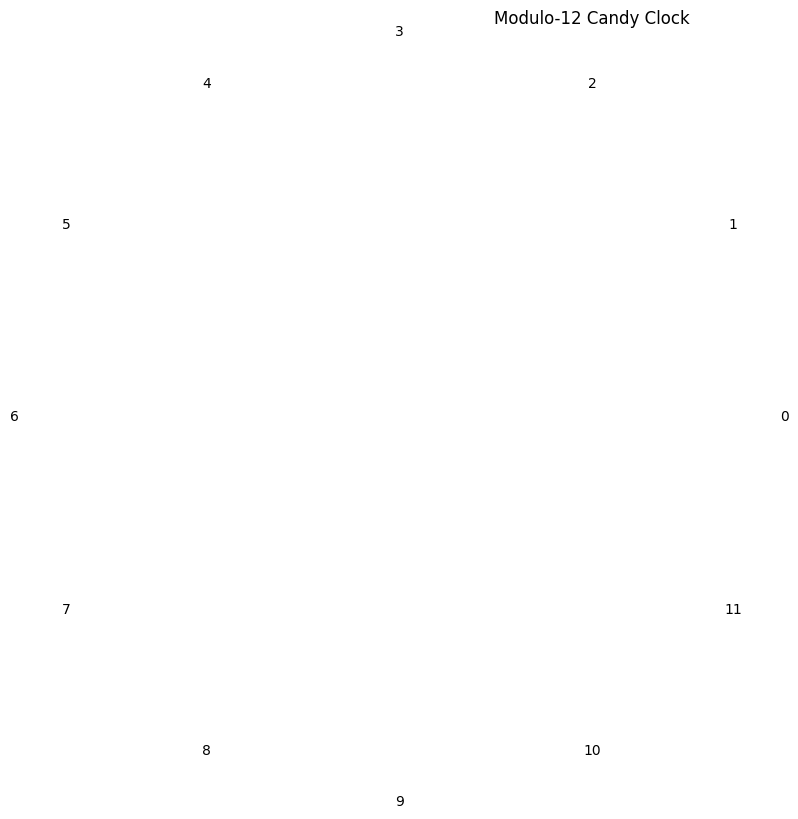

In [2]:

modulus = 12
nums = list(range(modulus))
def multiplicative_inverse(a):
    for candidate in nums:
        if (a * candidate) % modulus == 1:
            return candidate
    return None

print('Z12 inverses:')
for n in nums:
    inv = multiplicative_inverse(n)
    if inv is None:
        print(f'{n:2d} has no inverse')
    else:
        print(f'{n:2d} inverse {inv}')

# Build GF(9) sketch using x^2 + 1 over GF(3)
mod = 3
primitive = [1, 0, 1]


def add_poly(a, b):
    length = max(len(a), len(b))
    result = [0 for _ in range(length)]
    for idx in range(length):
        coeff_a = a[idx] if idx < len(a) else 0
        coeff_b = b[idx] if idx < len(b) else 0
        result[idx] = (coeff_a + coeff_b) % mod
    return result


def mul_poly(a, b):
    result = [0] * (len(a) + len(b) - 1)
    for i, ca in enumerate(a):
        for j, cb in enumerate(b):
            result[i + j] = (result[i + j] + ca * cb) % mod
    while len(result) > 2:
        if result[-1] == 0:
            result.pop()
        else:
            break
    if len(result) > 2:
        high = result.pop()
        result[-1] = (result[-1] - high) % mod
    return result


basis = [[1, 0], [0, 1]]
print('GF(9) basis elements (coeff pairs):', basis)

angles = np.linspace(0, 2 * np.pi, modulus, endpoint=False)
fig, ax = plt.subplots(figsize=(5, 5))
for idx, angle in enumerate(angles):
    ax.text(np.cos(angle), np.sin(angle), str(idx), ha='center', va='center')
ax.set_title('Modulo-12 Candy Clock')
ax.set_aspect('equal')
ax.axis('off')
plt.show()


### Final Hands-on Challenge
Prove whether Z₁₂ is a field or not and construct a simple field of order 9 using code cells. "Have learners prove Z₁₂’s downfall and then code a tiny order-9 field, sharing why the candy spell finally works."

In [3]:

# 📌 Final Hands-on Task
# Prove whether Z₁₂ is a field or not and construct a simple field of order 9 using code cells. "Have learners prove Z₁₂’s downfall and then code a tiny order-9 field, sharing why the candy spell finally works."

# Use the cells above as inspiration, then document your reasoning below.
# Feel free to add markdown, code, or even upload supporting images.
